[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1YEf9mC_JY8anU-SD3nW8_tua8Qx-t-cb?usp=sharing)

# Clasificación de razas de perros
<h4>Names:<strong> Carlos Julian Herrera, Ali Villegas, Alfredo Quintero </strong></h4>   
 <h4>Students ID: <strong>A01114097, A01337596, A01337630 </strong> </h4>    
 <h4>Github:</h4>
 <ul>
  <li> <a href="https://github.com/JulianHerreraH/Sistemas_Inteligentes">Github Julian
  </a>
  </li>
  <li>
  <a href="https://github.com/AliVillegas/Sistemas-Inteligentes">Github Ali
  </a>
  </li>
  <li>
    <a href="https://github.com/alfredoqt/sistemas-inteligentes">Github Alfredo
    </a>
  </li>
 </ul>

# Redes neuronales convolucionales**
**Proyecto: identificación de razas de perros**

---

En esta notebook, ya se proporciona un código de plantilla y deberá implementar funciones adicionales para completar con éxito este proyecto. 

No necesitará modificar el código incluido más allá de lo solicitado. Las secciones que comienzan con '(IMPLEMENTACIÓN)' en el encabezado indican que el siguiente bloque de código requerirá una funcionalidad adicional que debe proporcionar. Se proporcionarán instrucciones para cada sección, y los detalles de la implementación están marcados en el bloque de código con una declaración "TODO". ¡Asegúrese de leer las instrucciones con atención!

Daremos los primeros pasos para desarrollar un algoritmo que pueda usarse como parte de una aplicación web o móvil.

Al final de este proyecto, su código aceptará cualquier imagen proporcionada por el usuario como entrada. Si se detecta un perro en la imagen, proporcionará una estimación de la raza del perro. Si se detecta un humano, proporcionará una estimación de la raza de perro que se parece más.

### El camino por delante

Dividimos la notebook en pasos separados.

    Paso 0: importar conjuntos de datos
    Paso 1: Detecta humanos
    Paso 2: detectar perros
    Paso 3: crea una CNN para clasificar las razas de perros (desde cero)
    Paso 4: Cree una CNN para clasificar las razas de perros (usando Transfer Learning)
    Paso 5: prueba tu algoritmo

### Paso 0: importar conjuntos de datos

    Descarga el conjunto de datos del perro. Descomprima la carpeta y colóquela en el directorio de inicio de este proyecto, en la ubicación / dogImages.
  

    Descarga el conjunto de datos humanos. Descomprima la carpeta y colóquela en el directorio de inicio, en location / lfw.

In [ ]:
import numpy as np
from glob import glob

# download dog and human dataset
!mkdir dataset
!wget -O dataset/dog_dataset.zip https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!wget -O dataset/human_dataset.zip https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
!unzip -q dataset/dog_dataset.zip 
!unzip -q dataset/human_dataset.zip

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

--2020-11-21 21:24:18--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.88
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dataset/dog_dataset.zip’

dataset/dog_dataset 100%[===================>]   1.05G  41.6MB/s    in 26s     

2020-11-21 21:24:44 (41.0 MB/s) - ‘dataset/dog_dataset.zip’ saved [1132023110/1132023110]

--2020-11-21 21:24:44--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.117.40
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.117.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘dataset/human_dataset.zip’

datas

### Paso 1: Detecta humanos

En esta sección, usaremos la implementación de OpenCV de clasificadores en cascada basados ​​en características de Haar para detectar rostros humanos en imágenes.

OpenCV proporciona muchos detectores de rostros previamente entrenados, almacenados como archivos XML en [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).

In [ ]:
import cv2 
# returns "True" if face is detected in image stored at img_path
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')
print(face_cascade)
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

<CascadeClassifier 0x7fd4a6f4ab10>




### Evaluar el detector de rostro humano

In [ ]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:200]
# -#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm
## on the images in human_files_short and dog_files_short.

def detect_face(images):
    cnt = 0
    for img in images:
        if face_detector(img):
            cnt += 1
    return cnt

In [ ]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline 
print("detect face in human_files: {} / {}".format(detect_face(human_files_short), len(human_files_short)))
print("detect face in dog_files: {} / {}".format(detect_face(dog_files_short), len(dog_files_short)))

detect face in human_files: 100 / 100
detect face in dog_files: 124 / 200


### Paso 2: detectar perros

En esta sección, usamos un modelo previamente entrenado para detectar perros en imágenes.

---

Usaremos el modelo VGG-16 previamente entrenado

La celda de código a continuación descarga el modelo VGG-16, junto con pesos que han sido entrenados en ImageNet, un conjunto de datos muy grande y muy popular que se utiliza para la clasificación de imágenes y otras tareas de visión. 

ImageNet contiene más de 10 millones de URL, cada una vinculada a una imagen que contiene un objeto de una de las 1000 categorías.

In [ ]:
import torch
import torchvision.models as models

# check if CUDA is available
use_cuda = torch.cuda.is_available()
print("cuda available? {0}".format(use_cuda))

cuda available? True


Antes de escribir la función, entra al siguiente [link](https://pytorch.org/docs/stable/torchvision/models.html) y tomen el tiempo para aprender cómo preprocesar adecuadamente los tensores para modelos previamente entrenados en la documentación de PyTorch.



In [ ]:
# define 4 models
VGG16 = models.vgg16(pretrained=True)
googlenet = models.googlenet(pretrained=True)
shufflenet = models.shufflenet_v2_x1_0(pretrained=True)
alexnet = models.alexnet(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    googlenet = googlenet.cuda()
    shufflenet = shufflenet.cuda()
    alexnet = alexnet.cuda()

In [ ]:
from PIL import Image
import torchvision.transforms as transforms


def load_image(img_path):    
    input_image = Image.open(img_path)

    # resize to (244, 244) because VGG16 accept this shape
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = input_tensor.unsqueeze(0)
    return image

In [ ]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = VGG16(img)
    return torch.max(ret,1)[1].item() # predicted class index

In [ ]:
# predict dog using ImageNet class
print(f'{dog_files_short[50]} - ImageNet index is 206')
print(f'Predicted index: {VGG16_predict(dog_files_short[50])}')

dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03917.jpg - ImageNet index is 206
Predicted index: 206


In [ ]:
def googlenet_predict(img_path):
    '''
    Use pre-trained GoogLeNet model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to GoogLeNet model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = googlenet(img)
    return torch.max(ret,1)[1].item() # predicted class index

In [ ]:
# predict dog using ImageNet class
print(f'{dog_files_short[50]} - ImageNet index is 206')
print(f'Predicted index: {googlenet_predict(dog_files_short[50])}')

dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03917.jpg - ImageNet index is 206
Predicted index: 876


In [ ]:
def shufflenet_predict(img_path):
    '''
    Use pre-trained ShuffleNet model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to ShuffleNet model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = shufflenet(img)
    return torch.max(ret,1)[1].item() # predicted class index https://pytorch.org/hub/pytorch_vision_shufflenet_v2/

In [ ]:
print(f'{dog_files_short[50]} - ImageNet index is 206')
print(f'Predicted index: {shufflenet_predict(dog_files_short[50])}')

dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03917.jpg - ImageNet index is 206
Predicted index: 558


In [ ]:
def alexnet_predict(img_path):
    '''
    Use pre-trained AlexaNet model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to AlexaNet model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = alexanet(img)
    
    return torch.max(ret,1)[1].item() # predicted class index https://pytorch.org/hub/pytorch_vision_resnet/

In [ ]:
print(f'{dog_files_short[50]} - ImageNet index is 206')
print(f'Predicted index: {alexnet_predict(dog_files_short[50])}')

dogImages/train/055.Curly-coated_retriever/Curly-coated_retriever_03917.jpg - ImageNet index is 206
Predicted index: 206


In [ ]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, model):
    ## TODO: Complete the function.
    if model == 'VGG16':
      pred = VGG16_predict(img_path)
    elif model == 'GOOGLENET':
      pred = googlenet_predict(img_path)
    elif model == 'SHUFFLENET':
      pred = shufflenet_predict(img_path)
    else:
      pred = alexnet_predict(img_path)
    return pred >= 151 and pred <= 268 # true/false

In [ ]:
print('Is it a dog?')
print("VGG16:", dog_detector(dog_files_short[0], 'VGG16')) #Using VGG16 model
print("GoogLeNet:", dog_detector(dog_files_short[0], 'GOOGLENET')) # Using GoogLeNet Model 
print("ShuffleNet:", dog_detector(dog_files_short[0], 'SHUFFLENET')) # Using Shufflenet Model 
print("AlexNet:", dog_detector(dog_files_short[0], 'ALEXANET')) # Using alexNet Model 

Is it a dog?
VGG16: True
GoogLeNet: False
ShuffleNet: True
AlexNet: True


In [ ]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_detector_test(files, model):
    cnt = 0
    for file in files:
        if dog_detector(file, model):
            cnt += 1
    return cnt, len(files)

In [ ]:
# Using VGG16
humans, count_h = dog_detector_test(human_files_short, 'VGG16')
dogs, count_d = dog_detector_test(dog_files_short, 'VGG16')
print("VGG16 detects a dog in human_files: {} / {}".format(humans, count_h))
print("VGG16 detects a dog in dog_files: {} / {}".format(dogs, count_d))

# Using ShuffleNet
humans_sh, count_sh = dog_detector_test(human_files_short, 'SHUFFLENET')
dogs_sh, count_dogs_sh = dog_detector_test(dog_files_short, 'SHUFFLENET')
print("ShuffleNet detects a dog in human_files: {} / {}".format(humans_sh, count_sh))
print("ShuffleNet detects a dog in dog_files: {} / {}".format(dogs_sh, count_dogs_sh))

# Using AlexNet
humans_rn, count_rn = dog_detector_test(human_files_short, 'ALEXNET')
dogs_rn, count_dogs_rn = dog_detector_test(dog_files_short, 'ALEXNET')
print("AlexNet detects a dog in human_files: {} / {}".format(humans_rn, count_rn))
print("AlexNet detects a dog in dog_files: {} / {}".format(dogs_rn, count_dogs_rn))

VGG16 detects a dog in human_files: 0 / 100
VGG16 detects a dog in dog_files: 199 / 200
ShuffleNet detects a dog in human_files: 13 / 100
ShuffleNet detects a dog in dog_files: 37 / 200
AlexNet detects a dog in human_files: 0 / 100
AlexNet detects a dog in dog_files: 196 / 200


Text(0.5, 1.0, 'Detección de perros por modelo')

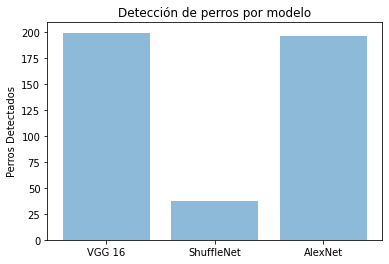

In [ ]:
import matplotlib.pyplot as plt                        
%matplotlib inline 

models = ('VGG 16', 'ShuffleNet', 'AlexNet')
y_pos = np.arange(len(models))
performance = [dogs, dogs_sh, dogs_rn]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('Perros Detectados')
plt.title('Detección de perros por modelo')

Sugerimos VGG-16 como una red potencial para detectar imágenes de perros en el algoritmo, pero pueden explorar otras redes previamente entrenadas (como Inception-v3, ResNet-50, etc.). 



### Paso 3: crea una CNN para clasificar las razas de perros (desde cero)

Ahora que tenemos funciones para detectar humanos y perros en imágenes, necesitamos una forma de predecir la raza a partir de imágenes. En este paso, crearán una CNN que clasifica las razas de perros. 

---
Deben crear su CNN desde cero (por lo tanto, ¡todavía no puede usar el aprendizaje por transferencia!), Y debe lograr una precisión de prueba de al menos el 10%. En el paso 4, tendrán la oportunidad de utilizar el aprendizaje por transferencia para crear una CNN que alcance una precisión mucho mayor.



In [ ]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0

data_dir = 'dogImages/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [ ]:
data_transforms = {'train': transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     normalize]),
                   'val': transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     normalize]),
                   'test': transforms.Compose([transforms.Resize(size=(224,224)),
                                     transforms.ToTensor(), 
                                     normalize])
                  }

In [ ]:
train_data = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
valid_data = datasets.ImageFolder(valid_dir, transform=data_transforms['val'])
test_data = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data,
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)
loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

Se ha aplicado RandomResizedCrop y RandomHorizontalFlip a los datos de entrenamiento. 

---

Esto permite tener más imágenes usando técnicas de aumento de imagen. Generará más imágenes redimensionadas y volteadas. Mejorará el rendimiento del modelo y también ayudará a evitar el sobreajuste de los datos. Para los datos de validación, solo he aplicado las transformaciones de recorte de tamaño y centrado. Y, para los datos de prueba, solo se ha aplicado el cambio de tamaño de la imagen.

Crea una CNN para clasificar las razas de perros. Utilice la plantilla en la celda de código a continuación.

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

num_classes = 133 # total classes of dog breeds

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7 * 7 * 128, 512)
        self.fc2 = nn.Linear(512, num_classes) 
        
        # drop-out
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 7*7*128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


La primera capa de convolución tendrá un tamaño de kernel de 3 y stride 2, esto reducirá el tamaño de la imagen de entrada a la mitad. La segunda capa de convolución también tendrá el mismo tamaño, lo que reducirá el tamaño de la imagen de entrada a la mitad. La tercera capa de convolución tendrá un tamaño de kernel de 3.

Se ha aplicado la combinación máxima de stride 2 después de cada capa de convolución para reducir el tamaño de la imagen a la mitad. También se aplica la activación de Relu para cada una de las capas de convolución.

Luego, se "aplanó" (flattened) las entradas y se aplicó una capa de dropout con probabilidad de 0.3. Se aplican dos capas completamente conectadas con la activación de Relu y el dropout de 0.3 para producir el resultado final que predecirá las clases de razas de perros.



In [ ]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.05)

In [ ]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, last_validation_loss=None):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    if last_validation_loss is not None:
        valid_loss_min = last_validation_loss
    else:
        valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [ ]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch 1, Batch 1 loss: 4.880885
Epoch 1, Batch 101 loss: 4.888456
Epoch 1, Batch 201 loss: 4.884160
Epoch 1, Batch 301 loss: 4.878090
Epoch: 1 	Training Loss: 4.874687 	Validation Loss: 4.808997
Validation loss decreased (inf --> 4.808997).  Saving model ...
Epoch 2, Batch 1 loss: 4.847804
Epoch 2, Batch 101 loss: 4.806896
Epoch 2, Batch 201 loss: 4.793183
Epoch 2, Batch 301 loss: 4.767332
Epoch: 2 	Training Loss: 4.761182 	Validation Loss: 4.575373
Validation loss decreased (4.808997 --> 4.575373).  Saving model ...
Epoch 3, Batch 1 loss: 4.533619
Epoch 3, Batch 101 loss: 4.641519
Epoch 3, Batch 201 loss: 4.644400
Epoch 3, Batch 301 loss: 4.632322
Epoch: 3 	Training Loss: 4.631402 	Validation Loss: 4.462532
Validation loss decreased (4.575373 --> 4.462532).  Saving model ...
Epoch 4, Batch 1 loss: 4.578752
Epoch 4, Batch 101 loss: 4.578179
Epoch 4, Batch 201 loss: 4.582273
Epoch 4, Batch 301 loss: 4.574895
Epoch: 4 	Training Loss: 4.574052 	Validation Loss: 4.449123
Validation loss de

In [ ]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

In [ ]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.496380


Test Accuracy: 18% (152/836)


### Paso 4: crea una CNN para clasificar las razas de perros (usando Transfer Learning)

Ahora utilizarán el aprendizaje por transferencia para crear una CNN que pueda identificar la raza de perro a partir de imágenes. Su CNN debe alcanzar al menos un 60% de precisión en el equipo de prueba.



In [ ]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

Utilicen el aprendizaje por transferencia para crear una CNN para clasificar las razas de perros. Usen la celda de código a continuación y guarden su modelo inicializado como la variable model_transfer.



In [ ]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

In [ ]:
for param in model_transfer.parameters():
    param.requires_grad = False

In [ ]:
model_transfer.fc = nn.Linear(2048, 133, bias=True)

In [ ]:
fc_parameters = model_transfer.fc.parameters()

In [ ]:
for param in fc_parameters:
    param.requires_grad = True

In [ ]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
if use_cuda:
    model_transfer = model_transfer.cuda()

Se ha seleccionado el modelo previamente entrenado ResNet50 porque tiene un buen rendimiento en la clasificación de imágenes. La idea principal de este modelo se llama "conexión de acceso directo de identidad" que omite una o más capas. Esto nos permite evitar el sobreajuste durante el entrenamiento. Finalmente, se agrega una capa final completamente conectada que generará las probabilidades de 133 clases de razas de perros.

------

Utilicen la siguiente celda de código para especificar una función de pérdida y un optimizador. Guarden la función de pérdida elegida como criticion_transfer y el optimizador como optimizer_transfer a continuación.

In [ ]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

In [ ]:
# train the model
# train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # initialize weights to zero
            optimizer.zero_grad()
            
            output = model(data)
            
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [ ]:
train(30, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch 1, Batch 1 loss: 4.564126
Epoch 1, Batch 101 loss: 4.441391
Epoch 1, Batch 201 loss: 4.414398
Epoch 1, Batch 301 loss: 4.393112
Epoch: 1 	Training Loss: 4.383115 	Validation Loss: 4.122710
Validation loss decreased (inf --> 4.122710).  Saving model ...
Epoch 2, Batch 1 loss: 4.315694
Epoch 2, Batch 101 loss: 4.254319
Epoch 2, Batch 201 loss: 4.231560
Epoch 2, Batch 301 loss: 4.205146
Epoch: 2 	Training Loss: 4.199203 	Validation Loss: 3.897591
Validation loss decreased (4.122710 --> 3.897591).  Saving model ...
Epoch 3, Batch 1 loss: 4.148036
Epoch 3, Batch 101 loss: 4.055957
Epoch 3, Batch 201 loss: 4.050339
Epoch 3, Batch 301 loss: 4.032107
Epoch: 3 	Training Loss: 4.026063 	Validation Loss: 3.683616
Validation loss decreased (3.897591 --> 3.683616).  Saving model ...
Epoch 4, Batch 1 loss: 3.885961
Epoch 4, Batch 101 loss: 3.910364
Epoch 4, Batch 201 loss: 3.890822
Epoch 4, Batch 301 loss: 3.866536
Epoch: 4 	Training Loss: 3.861079 	Validation Loss: 3.487331
Validation loss de

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

<All keys matched successfully>

In [ ]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.306218


Test Accuracy: 77% (648/836)


In [ ]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['test'].dataset.classes]

In [ ]:
loaders_transfer['train'].dataset.classes[:10]

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog']

In [ ]:
class_names[:13]

['Affenpinscher',
 'Afghan hound',
 'Airedale terrier',
 'Akita',
 'Alaskan malamute',
 'American eskimo dog',
 'American foxhound',
 'American staffordshire terrier',
 'American water spaniel',
 'Anatolian shepherd dog',
 'Australian cattle dog',
 'Australian shepherd',
 'Australian terrier']

In [ ]:
from PIL import Image
import torchvision.transforms as transforms

def load_input_image(img_path):    
    image = Image.open(img_path)
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     normalize])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image).unsqueeze(0)
    return image

In [ ]:
def predict_breed_transfer(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

### Paso 5: prueba tu algoritmo

En esta sección, ¡probarán su nuevo algoritmo! ¿A qué tipo de perro cree el algoritmo que te pareces? Si tienes un perro, ¿predice con precisión la raza de tu perro? Si tienes un gato, ¿cree erróneamente que tu gato es un perro?

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path, 'VGG16') is True:
        prediction = predict_breed_transfer(model_transfer, class_names, img_path)
        print("Dogs Detected!\nIt looks like a {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(model_transfer, class_names, img_path)
        print("Hello, human!\nIf you were a dog..You may look like a {0}".format(prediction))
    else:
        print("Error! Can't detect anything..")

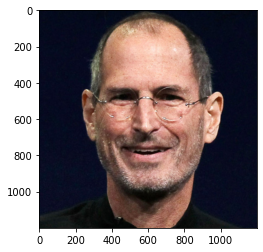

Hello, human!
If you were a dog..You may look like a Bull terrier


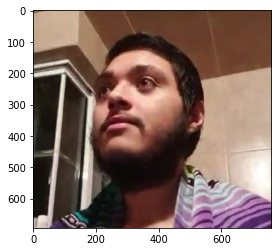

Hello, human!
If you were a dog..You may look like a Dogue de bordeaux


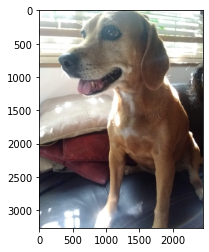

Dogs Detected!
It looks like a Beagle


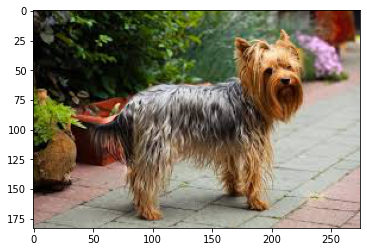

Dogs Detected!
It looks like a Silky terrier


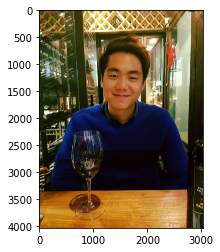

Hello, human!
If you were a dog..You may look like a Yorkshire terrier


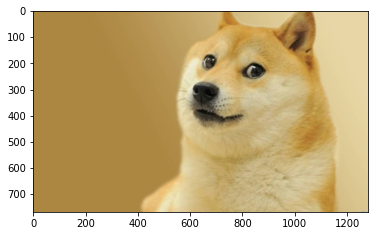

Dogs Detected!
It looks like a Chihuahua


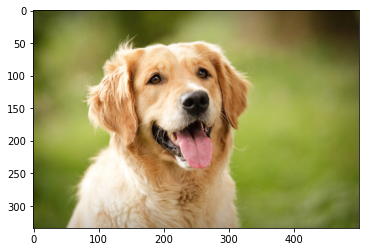

Dogs Detected!
It looks like a Golden retriever


In [ ]:
for img_file in os.listdir('my_images'):
    img_path = os.path.join('my_images', img_file)
    run_app(img_path)